In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gsw
import xarray as xr
import toolbox
import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob
import matplotlib

In [3]:
shp_dict = {}
files = glob('../data/ne_10m_bathymetry_all/*.shp')
assert len(files) > 0
files.sort()
for f in files:
    depth = f.split('_')[-1].split('.')[0]
    # depth = '-' + f.split('_')[-1].split('.')[0]
    # depths.append(depth)
    nei = cart.io.shapereader.Reader(f)
    shp_dict[depth] = nei

depths = [d for d in shp_dict.keys()][::-1]
colors = sns.mpl_palette('cmo.ice_r', n_colors=8)
cmap   = sns.mpl_palette('cmo.ice', n_colors=8, as_cmap=True)

In [3]:
sim = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/backtrack_SA/SA_5179m_t365_no_no_no.nc')
diff = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/backtrack_SA/SA_5179m_t365_diff_no_no.nc')

In [4]:
sim

<xarray.Dataset>
Dimensions:           (traj: 1000, obs: 366)
Dimensions without coordinates: traj, obs
Data variables: (12/13)
    trajectory        (traj, obs) float64 0.0 0.0 0.0 0.0 ... 999.0 999.0 999.0
    time              (traj, obs) datetime64[ns] 2019-12-30T12:00:00 ... 2018...
    lat               (traj, obs) float64 -32.17 -32.14 -32.08 ... -36.87 -36.79
    lon               (traj, obs) float64 6.289 6.353 6.382 ... 10.05 10.13
    z                 (traj, obs) float64 5.179e+03 5.187e+03 ... 4.719e+03
    cons_temperature  (traj, obs) float32 0.7186 0.7165 0.7192 ... 0.6347 0.6548
    ...                ...
    mld               (traj, obs) float32 30.64 46.48 48.47 ... 25.4 25.29 15.03
    Kz                (traj, obs) float32 0.0006628 4.609e-05 ... 3.108e-05
    radius            (traj, obs) float32 5e-05 5e-05 5e-05 ... 5e-05 5e-05
    volume            (traj, obs) float32 5.236e-13 5.236e-13 ... 5.236e-13
    density           (traj, obs) float32 1.035e+03 1.028e+03 ... 1.028e+03
    v_s               (traj, obs) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        v2.3.0-71-g202ef087
    parcels_mesh:           spherical

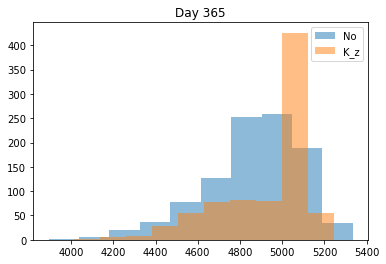

In [5]:
N=365
plt.hist(sim['z'][:, N],label='No', alpha=0.5)
plt.hist(diff['z'][:, N], label='K_z', alpha=0.5)
plt.title(f'Day {N}')
plt.legend()

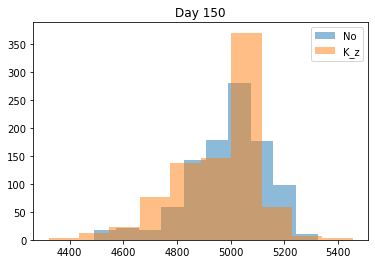

In [29]:
N=150
plt.hist(sim['z'][:, N],label='No', alpha=0.5)
plt.hist(diff['z'][:, N], label='K_z', alpha=0.5)
plt.title(f'Day {N}')
plt.legend()

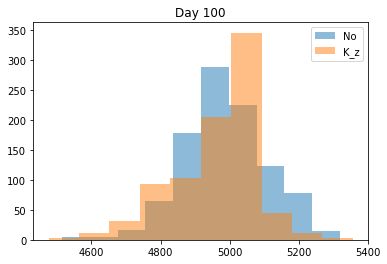

In [27]:
N=100
plt.hist(sim['z'][:, N],label='No', alpha=0.5)
plt.hist(diff['z'][:, N], label='K_z', alpha=0.5)
plt.title(f'Day {N}')
plt.legend()

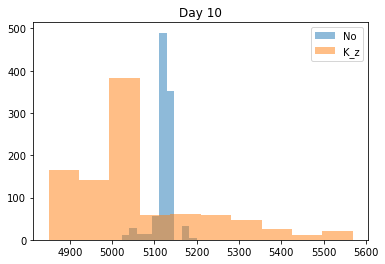

In [34]:
N=10
plt.hist(sim['z'][:, N],label='No', alpha=0.5)
plt.hist(diff['z'][:, N], label='K_z', alpha=0.5)
plt.title(f'Day {N}')
plt.legend()

Text(0.5, 1.0, '365 days no diffusion')

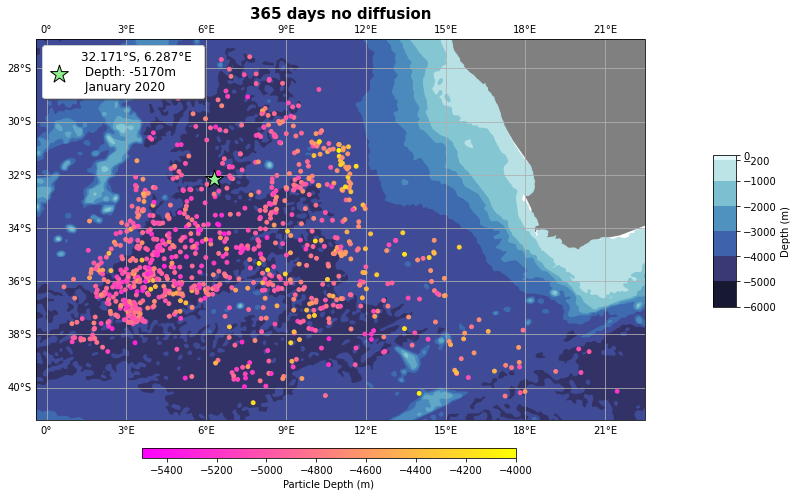

In [58]:
max_depth = -5500
min_depth = -4000

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
im = ax.scatter(sim['lon'][:,-1], sim['lat'][:,-1], zorder=4, 
           c=-sim['z'][:,-1], s=15, cmap='spring', vmax=max_depth, vmin=min_depth)
ax.legend(loc='upper left', shadow=True, fontsize=12)

bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle Depth (m)')
ax.set_title('365 days no diffusion', fontsize=15, weight='bold')
# plt.savefig('../figs/5170m_passive.png')

Text(0.5, 1.0, '365 days with diffusion')

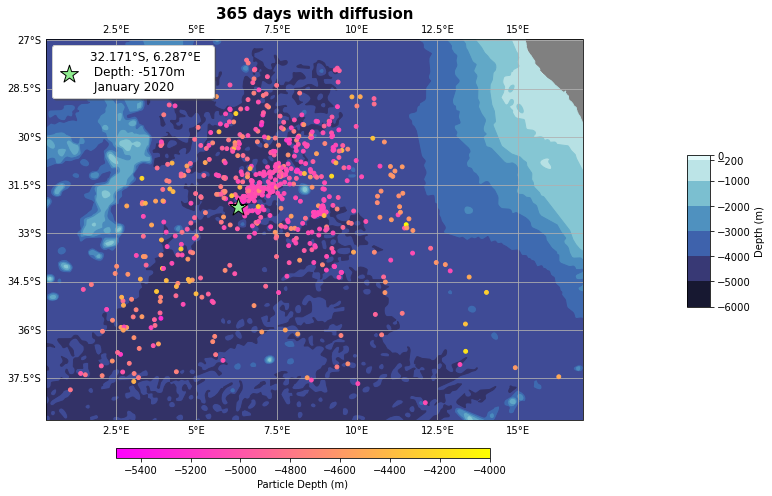

In [57]:
max_depth = -5500
min_depth = -4000

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
im = ax.scatter(diff['lon'][:,-1], diff['lat'][:,-1], zorder=4, 
           c=-diff['z'][:,-1], s=15, cmap='spring', vmax=max_depth, vmin=min_depth)
ax.legend(loc='upper left', shadow=True, fontsize=12)

bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle Depth (m)')
ax.set_title('365 days with diffusion', fontsize=15, weight='bold')
# plt.savefig('../figs/5170m_passive.png')

# FRagmentation

In [6]:
D = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/tests/6HQMCD.nc')

In [7]:
D

<xarray.Dataset>
Dimensions:           (traj: 1000, obs: 11)
Dimensions without coordinates: traj, obs
Data variables: (12/13)
    trajectory        (traj, obs) float64 0.0 0.0 0.0 0.0 ... 999.0 999.0 999.0
    time              (traj, obs) datetime64[ns] 2019-12-30T12:00:00 ... 2019...
    lat               (traj, obs) float64 -32.17 -32.14 -32.08 ... -31.72 -31.66
    lon               (traj, obs) float64 6.289 6.353 6.382 ... 6.593 6.612
    z                 (traj, obs) float64 5.179e+03 5.187e+03 ... 4.154e+03
    cons_temperature  (traj, obs) float32 0.7186 0.7165 0.7192 ... 0.9397 1.537
    ...                ...
    mld               (traj, obs) float32 30.64 46.48 48.47 ... 32.59 43.24
    Kz                (traj, obs) float32 0.0006628 4.609e-05 ... 1.544e-05
    radius            (traj, obs) float32 5e-05 5e-05 5e-05 ... 5e-05 6.3e-05
    volume            (traj, obs) float32 5.236e-13 5.236e-13 ... 1.047e-12
    density           (traj, obs) float32 1.035e+03 1.028e+03 ... 1.028e+03
    v_s               (traj, obs) float32 0.0 0.0 0.0 ... 0.001866 0.002962
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        v2.3.0-71-g202ef087
    parcels_mesh:           spherical

(array([388., 345., 185.,   0.,  58.,   0.,  23.,   0.,   0.,   1.]),
 array([4.99999987e-05, 6.08740083e-05, 7.17480216e-05, 8.26220275e-05,
        9.34960408e-05, 1.04370054e-04, 1.15244060e-04, 1.26118073e-04,
        1.36992079e-04, 1.47866100e-04, 1.58740106e-04], dtype=float32),
 <BarContainer object of 10 artists>)

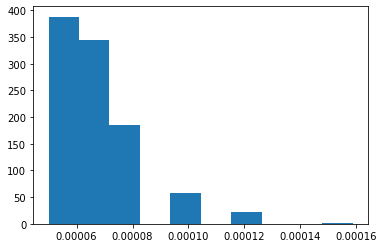

In [8]:
plt.hist(D['radius'][:, -1])

(array([426., 325., 172.,  55.,   0.,   0.,  21.,   0.,   0.,   1.]),
 array([0.        , 0.00188751, 0.00377503, 0.00566255, 0.00755006,
        0.00943758, 0.01132509, 0.01321261, 0.01510012, 0.01698763,
        0.01887515], dtype=float32),
 <BarContainer object of 10 artists>)

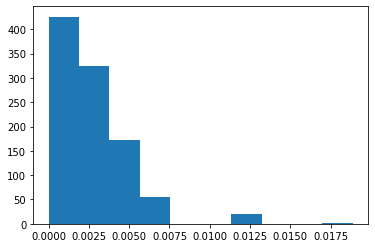

In [9]:
plt.hist(D['v_s'][:, -1])

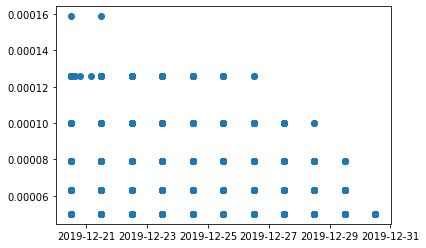

In [10]:
plt.scatter(D['time'], D['radius']);

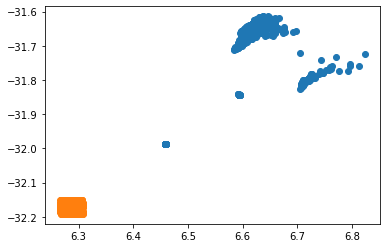

In [11]:
plt.scatter(D['lon'][:,-1], D['lat'][:,-1])
plt.scatter(D['lon'][:,0], D['lat'][:,0])

# plt.semilogy(D['radius'][1000,:]);


Text(0.5, 1.0, '365 days fragmentation')

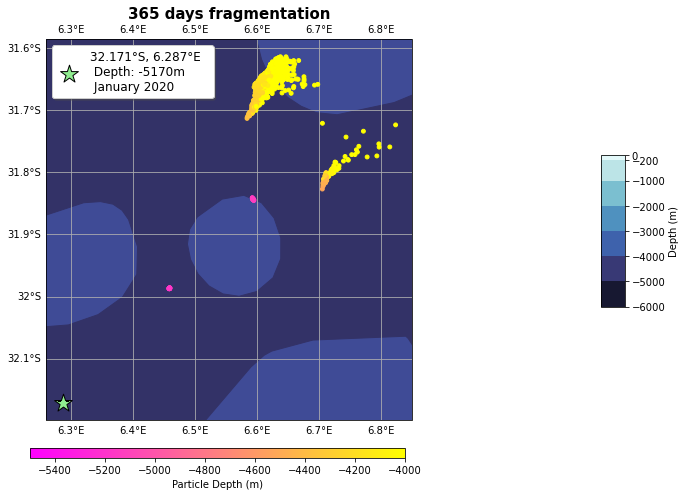

In [12]:
max_depth = -5500
min_depth = -4000

N = 10

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
im = ax.scatter(D['lon'][:,N], D['lat'][:,N], zorder=4, 
           c=-D['z'][:,N], s=15, cmap='spring', vmax=max_depth, vmin=min_depth)
ax.legend(loc='upper left', shadow=True, fontsize=12)

bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle Depth (m)')
ax.set_title('365 days fragmentation', fontsize=15, weight='bold')
# plt.savefig('../figs/5170m_passive.png')

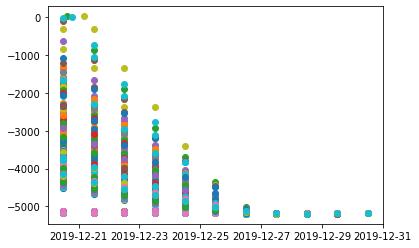

In [13]:
for i in range(1000):
    plt.scatter(D['time'][i], -D['z'][i]);

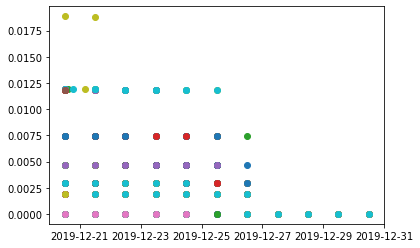

In [14]:
for i in range(1000):
    plt.scatter(D['time'][i], D['v_s'][i]);

Text(0.5, 1.0, '365 days with diffusion')

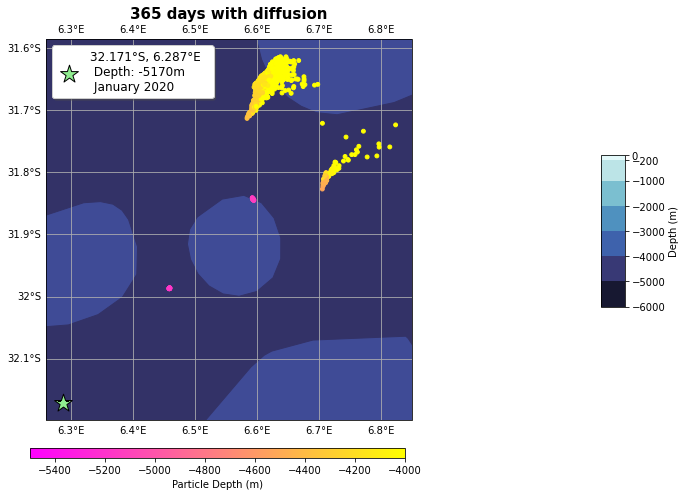

In [15]:
max_depth = -5500
min_depth = -4000

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
im = ax.scatter(D['lon'][:,-1], D['lat'][:,-1], zorder=4, 
           c=-D['z'][:,-1], s=15, cmap='spring', vmax=max_depth, vmin=min_depth)
ax.legend(loc='upper left', shadow=True, fontsize=12)

bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle Depth (m)')
ax.set_title('365 days with diffusion', fontsize=15, weight='bold')
# plt.savefig('../figs/5170m_passive.png')

In [4]:
F = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/frag_runs/XMIZR4.nc')

In [5]:
F

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 366)
Dimensions without coordinates: traj, obs
Data variables: (12/13)
    trajectory        (traj, obs) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    time              (traj, obs) datetime64[ns] 2019-12-30T12:00:00 ... NaT
    lat               (traj, obs) float64 -32.16 -32.13 -32.1 ... nan nan nan
    lon               (traj, obs) float64 6.289 6.353 6.375 ... nan nan nan
    z                 (traj, obs) float64 5.179e+03 5.187e+03 ... nan nan
    cons_temperature  (traj, obs) float32 0.7186 0.7165 0.7275 ... nan nan nan
    ...                ...
    mld               (traj, obs) float32 30.64 46.48 50.82 ... nan nan nan
    Kz                (traj, obs) float32 0.0006628 4.609e-05 ... nan nan
    radius            (traj, obs) float32 5e-05 5e-05 5e-05 ... nan nan nan
    volume            (traj, obs) float32 5.236e-13 5.236e-13 ... nan nan
    density           (traj, obs) float32 1.035e+03 1.028e+03 ... nan nan
    v_s               (traj, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        v2.3.0-71-g202ef087
    parcels_mesh:           spherical

Text(0.5, 1.0, '$\\lambda_f = 100$ days. No $K_z$')

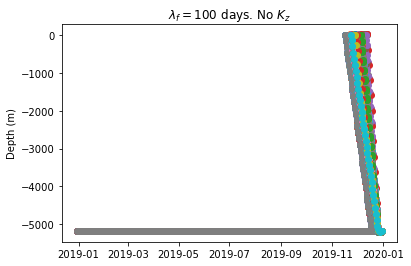

In [6]:
for i in range(1000):
    plt.scatter(F['time'][i], -F['z'][i]);
    
plt.ylabel('Depth (m)')
plt.title(r'$\lambda_f = 100$ days. No $K_z$')

Text(0.5, 1.0, '365 days with diffusion')

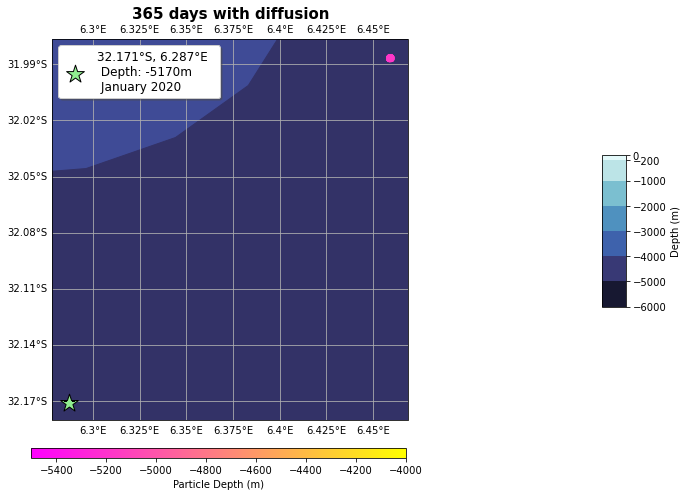

In [7]:
max_depth = -5500
min_depth = -4000

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
im = ax.scatter(F['lon'][:,-1], F['lat'][:,-1], zorder=4, 
           c=-F['z'][:,-1], s=15, cmap='spring', vmax=max_depth, vmin=min_depth)
ax.legend(loc='upper left', shadow=True, fontsize=12)

bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle Depth (m)')
ax.set_title('365 days with diffusion', fontsize=15, weight='bold')
# plt.savefig('../figs/5170m_passive.png')

Text(0.5, 1.0, '$\\lambda_f = 100$ days. No $K_z$')

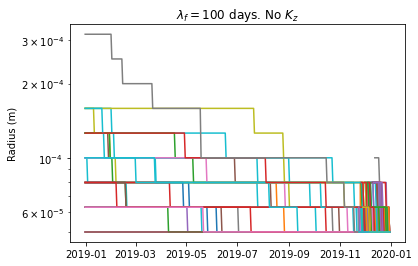

In [8]:
for i in range(1000):
    plt.semilogy(F['time'][i], F['radius'][i]);
    
plt.ylabel('Radius (m)')
plt.title(r'$\lambda_f = 100$ days. No $K_z$')

In [9]:
G = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/frag_runs/LK2MBX.nc')

Text(0.5, 1.0, '$\\lambda_f = 10$ days. No $K_z$')

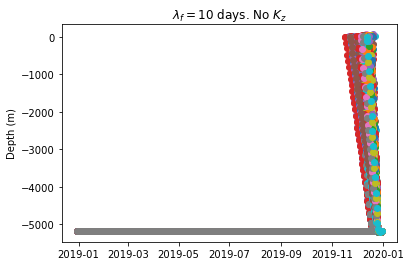

In [10]:
for i in range(1000):
    plt.scatter(G['time'][i], -G['z'][i]);
    
plt.ylabel('Depth (m)')
plt.title(r'$\lambda_f = 10$ days. No $K_z$')

Text(0.5, 1.0, '$\\lambda_f = 10$ days. No $K_z$')

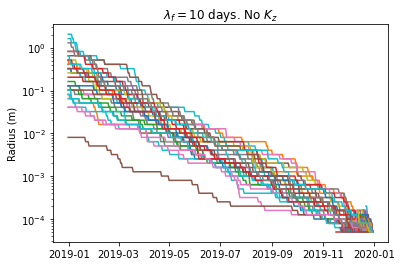

In [11]:
for i in range(1000):
    plt.semilogy(G['time'][i], G['radius'][i]);
    
plt.ylabel('Radius (m)')
plt.title(r'$\lambda_f = 10$ days. No $K_z$')

Text(0, 0.5, 'Radius (m)')

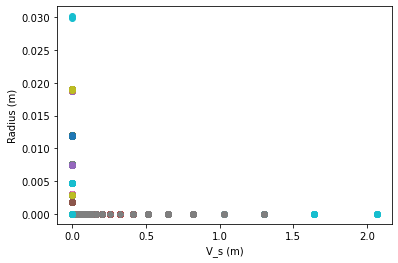

In [12]:
for i in range(1000):
    plt.scatter(G['radius'][i], G['v_s'][i]);
plt.xlabel('V_s (m)')
plt.ylabel('Radius (m)')

Text(0.5, 1.0, '$\\lambda_f = 10$ days. No $K_z$')

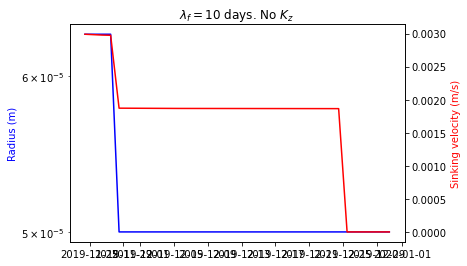

In [13]:
N = 666

fig,ax = plt.subplots()
ax.semilogy(G['time'][N], G['radius'][N], c='blue', label='Radius')
ax.set_ylabel('Radius (m)', color='blue')
ax2 = ax.twinx()
ax2.plot(G['time'][N], G['v_s'][N], c='red', label='v_s')
ax2.set_ylabel('Sinking velocity (m/s)', color='red')

plt.title(r'$\lambda_f = 10$ days. No $K_z$')

In [1]:
N = 666

fig,ax = plt.subplots()
ax.plot(G['time'][N], G['density'][N], c='blue', label='Radius')
ax.set_ylabel('density (m)', color='blue')
ax2 = ax.twinx()
ax2.plot(G['time'][N], G['v_s'][N], c='red', label='v_s')
ax2.set_ylabel('Sinking velocity (m/s)', color='red')

plt.title(r'$\lambda_f = 10$ days. No $K_z$')

NameError: name 'plt' is not defined

In [20]:
def SinkingVelocity(density,radius):
    rho_p = 1380
    rho_f = density
    nu = 1e-6
    alpha = radius
    g = 9.81
    
    beta = 3*rho_f/(2*rho_p + rho_f)
    tau_p = alpha*alpha/(3*beta*nu)
    
    v_s = (1 - beta)*g*tau_p

    return v_s

In [22]:
v_s = SinkingVelocity(G['density'], G['radius'])

In [23]:
v_s == G['v_s']

<xarray.DataArray (traj: 10000, obs: 366)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Dimensions without coordinates: traj, obs

Text(0.5, 1.0, '$\\lambda_f = 10$ days. No $K_z$')

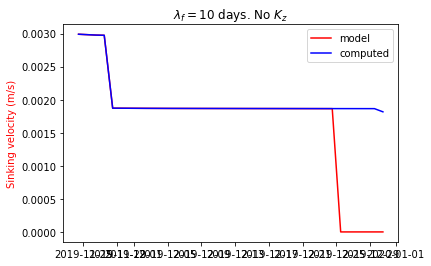

In [28]:
N = 666
plt.plot(G['time'][N], G['v_s'][N], c='red', label='model')
plt.plot(G['time'][N], v_s[N], c='blue', label='computed')
plt.ylabel('Sinking velocity (m/s)', color='red')
plt.legend()
plt.title(r'$\lambda_f = 10$ days. No $K_z$')

In [18]:
G['density']

<xarray.DataArray 'density' (traj: 10000, obs: 366)>
array([[1035.    , 1028.1815, 1028.1799, ...,       nan,       nan,
              nan],
       [1035.    , 1028.1815, 1028.1809, ...,       nan,       nan,
              nan],
       [1035.    , 1028.1815, 1028.1816, ...,       nan,       nan,
              nan],
       ...,
       [1035.    , 1028.1815, 1028.1818, ...,       nan,       nan,
              nan],
       [1035.    , 1028.1816, 1028.1818, ...,       nan,       nan,
              nan],
       [1035.    , 1028.1815, 1028.1823, ...,       nan,       nan,
              nan]], dtype=float32)
Dimensions without coordinates: traj, obs
Attributes:
    long_name:      
    standard_name:  density
    units:          unknown

Text(0.5, 1.0, '$\\lambda_f = 100$ days. No $K_z$')

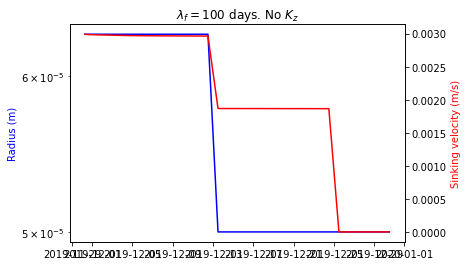

In [34]:
N = 700

fig,ax = plt.subplots()
ax.semilogy(F['time'][N], F['radius'][N], c='blue', label='Radius')
ax.set_ylabel('Radius (m)', color='blue')
ax2 = ax.twinx()
ax2.plot(F['time'][N], F['v_s'][N], c='red', label='v_s')
ax2.set_ylabel('Sinking velocity (m/s)', color='red')
plt.title(r'$\lambda_f = 100$ days. No $K_z$')

In [35]:
0.003*60*60

10.799999999999999

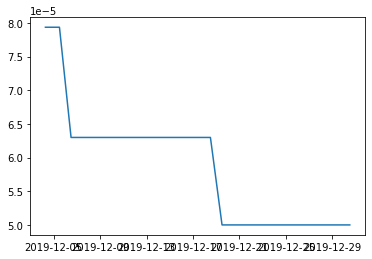

In [80]:
N = 0
plt.plot(G['time'][N], G['radius'][N])
plt.plot(G['time'][N], G['ra'])

Text(0.5, 1.0, '365 days with diffusion')

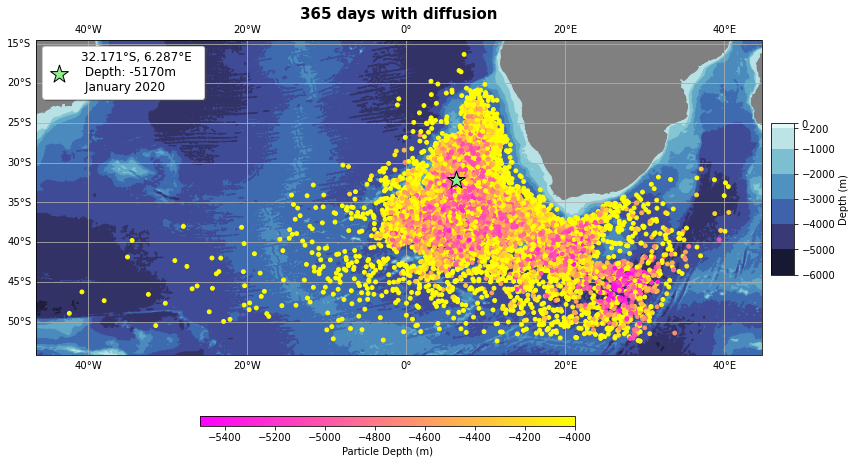

In [11]:
max_depth = -5500
min_depth = -4000

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
im = ax.scatter(F10['lon'][:,-1], F10['lat'][:,-1], zorder=4, 
           c=-F10['z'][:,-1], s=15, cmap='spring', vmax=max_depth, vmin=min_depth)
ax.legend(loc='upper left', shadow=True, fontsize=12)

bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle Depth (m)')
ax.set_title('365 days with diffusion', fontsize=15, weight='bold')
# plt.savefig('../figs/5170m_passive.png')